In [1]:
from wdlen import wordlenth
from nltk.corpus.reader import CHILDESCorpusReader
import nltk
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
corpus_root = nltk.data.find( 'corpora/CHILDES/Chinese/')
LWL = CHILDESCorpusReader(corpus_root, 'LeeWongLeung/.*.xml')
wdlen = wordlenth(LWL)

In [3]:
df = pd.DataFrame(wdlen).dropna()
df = df[['fname', 'age', 'one','two','three', 'four', 'five']]
df

,fname,age,one,two,three,four,five
0,LeeWongLeung/0extra/ccc11008.xml,22,115,111,26,11,3
1,LeeWongLeung/0extra/ccc11100.xml,23,32,65,26,11,5
2,LeeWongLeung/0extra/ccc20923.xml,34,211,178,185,97,70
3,LeeWongLeung/0extra/ccc21013.xml,34,142,229,203,126,169
4,LeeWongLeung/0extra/ccc21027.xml,35,108,231,212,126,110
5,LeeWongLeung/0extra/cgk11101.xml,23,135,118,83,31,8
6,LeeWongLeung/0extra/cgk11108.xml,23,84,86,41,15,3
7,LeeWongLeung/0extra/cgk20818.xml,33,141,119,96,80,133
8,LeeWongLeung/0extra/cgk20909.xml,33,175,136,106,76,104
9,LeeWongLeung/0extra/ckt10522.xml,18,13,1,1,0,0


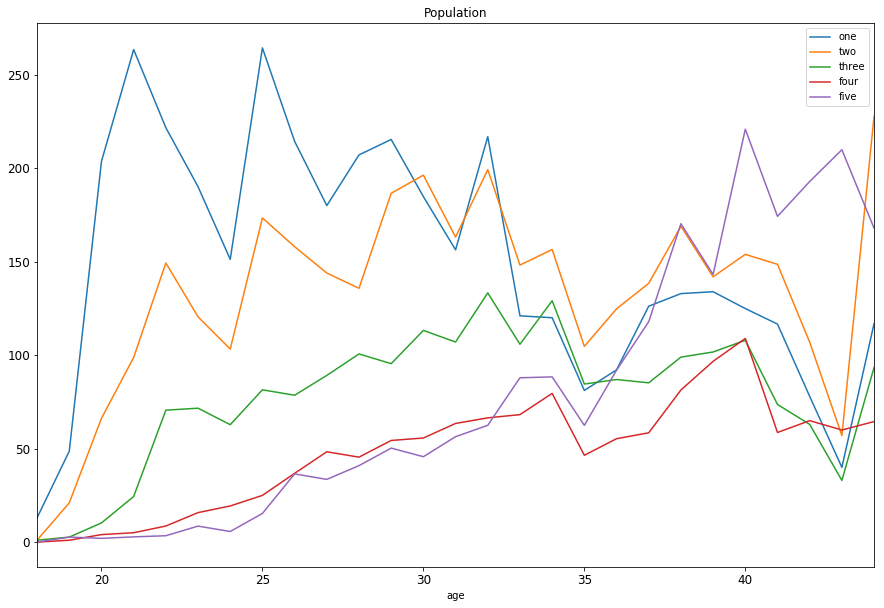

In [4]:
plt.figure()
df2 = df.groupby('age').mean().reset_index()
df2.set_index('age').plot.line(rot=0, title='Population', figsize=(15,10), fontsize=12)
plt.show()